## Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_decrease'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

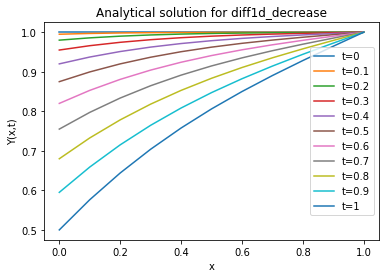

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 2726
         Function evaluations: 2927
         Gradient evaluations: 2927
8min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 8.038402110579438e-06
 hess_inv: array([[ 47732.7129171 ,  -4093.16380821,  -3584.51920852, ...,
         13998.27455301,  -2428.52194298,  -2501.28514714],
       [ -4093.16505674,    917.2043336 ,    710.41374974, ...,
         -3947.74734694,    461.37704539,    890.73375853],
       [ -3584.51558738,    710.41302721,   2742.02868559, ...,
           751.67108589,    627.61109396,    591.58667515],
       ...,
       [ 13998.20415523,  -3947.74071127,    751.6818181 , ...,
        138455.94648955,   5777.98438009, -13981.69886924],
       [ -2428.52874484,    461.3774555 ,    627.61247634, ...,
          5777.9772443 ,    910.81782163,   -205.59583584],
       [ -2501.27969438,    890.73321858,    591.58610588, ...,
        -13981.7

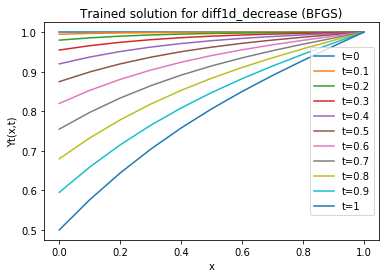

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

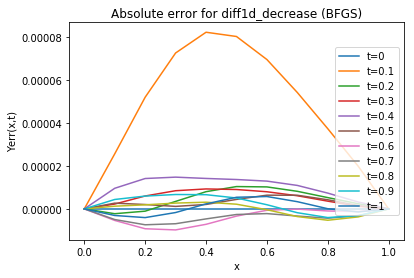

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

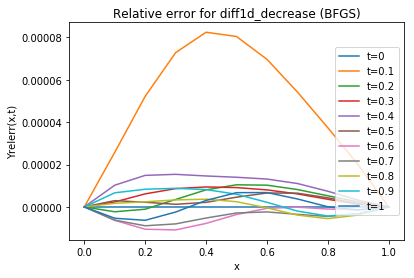

In [11]:
Yrelerr1 = (Yt1-Ya)/Ya
for i in range(nt):
    plt.plot(xt, Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s)' % (eq_name, trainalg));

## BFGS (gtol=1e-6)

In [10]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 5802
         Function evaluations: 6192
         Gradient evaluations: 6192
17min 40s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.4686906731202932e-06
 hess_inv: array([[ 1.42807305e+05, -2.31928846e+04, -2.49024166e+04, ...,
        -1.42820527e+05, -1.31151982e+03,  5.76245185e+04],
       [-2.31928627e+04,  6.12685093e+03,  5.34330826e+03, ...,
         3.68818643e+04,  3.64427221e+02, -1.14392363e+04],
       [-2.49022771e+04,  5.34328041e+03,  1.86778751e+04, ...,
         1.70759576e+04,  3.35545462e+02, -1.49987559e+04],
       ...,
       [-1.42820722e+05,  3.68819172e+04,  1.70762607e+04, ...,
         3.85093911e+05,  2.55906483e+03, -4.43261811e+04],
       [-1.31151963e+03,  3.64427258e+02,  3.35547170e+02, ...,
         2.55906382e+03,  2.76715337e+01, -5.44122231e+02],
       [ 5.76243899e+04, -1.14392156e+04, -1.49987849e+04, ...,
        -4.432

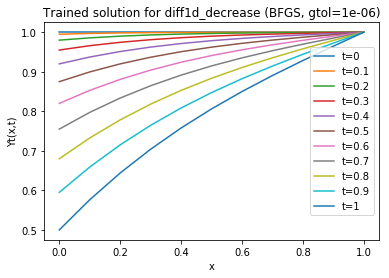

In [12]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

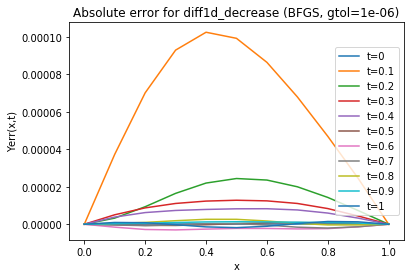

In [13]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

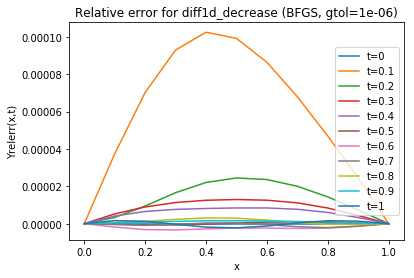

In [14]:
Yrelerr2 = (Yt2-Ya)/Ya
for i in range(nt):
    plt.plot(xt, Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8)

In [25]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

         Current function value: 0.000001
         Iterations: 8000
         Function evaluations: 8535
         Gradient evaluations: 8535
24min 58s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 9.61087632413974e-07
 hess_inv: array([[108654.59621877,  -9580.34165196, -20309.30458114, ...,
         33633.31129863,   3587.89453219,  -2604.4137338 ],
       [ -9580.35310278,   2923.15502925,  -4444.51787006, ...,
         -3719.38930374,   -424.35425029,    952.17273523],
       [-20309.08211317,  -4444.56360256,  91613.73471038, ...,
        -12951.24490621,    974.08215097,  -3629.64940796],
       ...,
       [ 33633.37821569,  -3719.39450897, -12951.47277825, ...,
         31434.04601628,   2085.14969839,  -1508.97535142],
       [  3587.89788829,   -424.35429783,    974.07998592, ...,
          2085.15192676,    383.55668358,   -243.33727584],
       [ -2604.42496678,    952.17364984,  -3629.63887905, ...,
         -1508.98174822,   -243.33726915,    464.81280

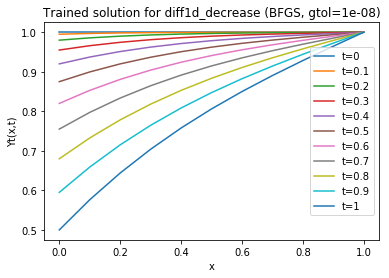

In [26]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

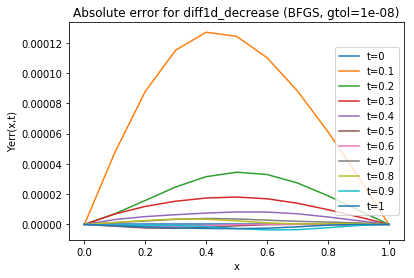

In [27]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

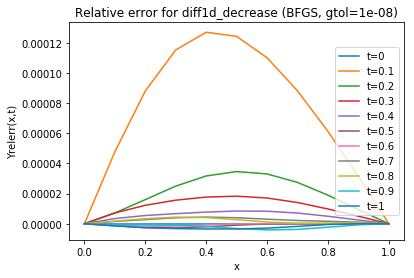

In [28]:
Yrelerr3 = (Yt3-Ya)/Ya
for i in range(nt):
    plt.plot(xt, Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8, maxiter=16000)

In [29]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

         Current function value: 0.000001
         Iterations: 12627
         Function evaluations: 13560
         Gradient evaluations: 13548
40min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 6.483744640023722e-07
 hess_inv: array([[ 1.67346464e+05, -6.39530246e+04,  3.97944440e+04, ...,
         2.42583060e+05, -2.42985682e+03, -4.54054151e+03],
       [-6.41336303e+04,  1.00806110e+05, -2.75333397e+03, ...,
        -3.31014761e+05,  4.68346214e+03, -3.59775203e+03],
       [ 3.99580369e+04, -3.35126343e+03,  1.53628218e+05, ...,
         6.69221950e+04, -1.38491299e+02, -7.37477610e+03],
       ...,
       [ 2.42941597e+05, -3.31095242e+05,  6.49782564e+04, ...,
         1.21192733e+06, -1.75796564e+04,  1.19849964e+04],
       [-2.42647809e+03,  4.67221136e+03, -1.29386376e+02, ...,
        -1.75489821e+04,  4.72694548e+02, -5.02234461e+02],
       [-4.57403177e+03, -3.55938864e+03, -7.36941096e+03, ...,
         1.18696678e+04, -5.02412734e+02,  2.27813

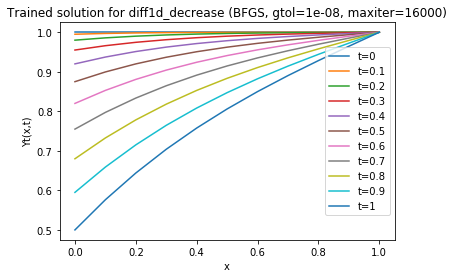

In [30]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

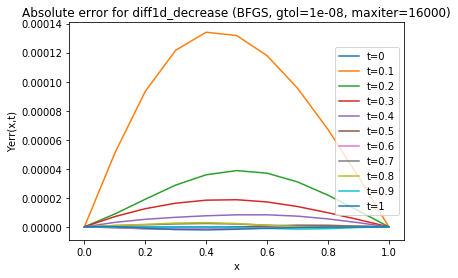

In [31]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

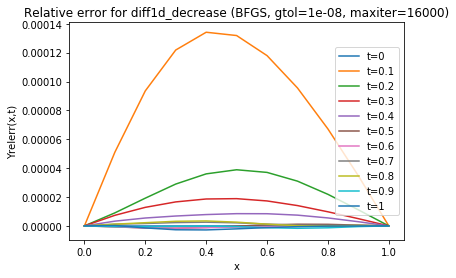

In [32]:
Yrelerr4 = (Yt4-Ya)/Ya
for i in range(nt):
    plt.plot(xt, Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

## BFGS (gtol=1e-8, maxiter=32000)

In [34]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

         Current function value: 0.000001
         Iterations: 12627
         Function evaluations: 13560
         Gradient evaluations: 13548
38min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 6.483744640023722e-07
 hess_inv: array([[ 1.67346464e+05, -6.39530246e+04,  3.97944440e+04, ...,
         2.42583060e+05, -2.42985682e+03, -4.54054151e+03],
       [-6.41336303e+04,  1.00806110e+05, -2.75333397e+03, ...,
        -3.31014761e+05,  4.68346214e+03, -3.59775203e+03],
       [ 3.99580369e+04, -3.35126343e+03,  1.53628218e+05, ...,
         6.69221950e+04, -1.38491299e+02, -7.37477610e+03],
       ...,
       [ 2.42941597e+05, -3.31095242e+05,  6.49782564e+04, ...,
         1.21192733e+06, -1.75796564e+04,  1.19849964e+04],
       [-2.42647809e+03,  4.67221136e+03, -1.29386376e+02, ...,
        -1.75489821e+04,  4.72694548e+02, -5.02234461e+02],
       [-4.57403177e+03, -3.55938864e+03, -7.36941096e+03, ...,
         1.18696678e+04, -5.02412734e+02,  2.27813

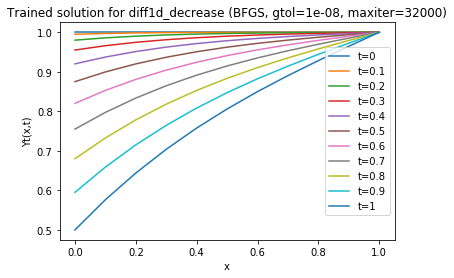

In [35]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

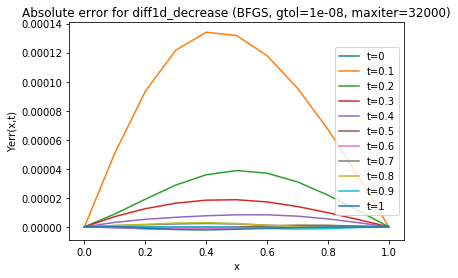

In [36]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));

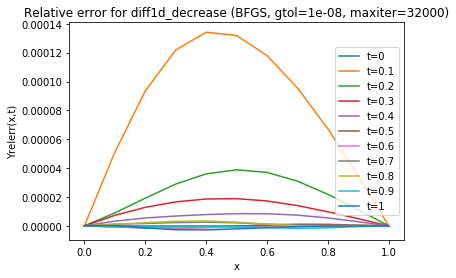

In [38]:
Yrelerr5 = (Yt5-Ya)/Ya
for i in range(nt):
    plt.plot(xt, Yrelerr5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, gtol=%g, maxiter=%d)' % (eq_name, trainalg, options['gtol'], options['maxiter']));